From the FITS files

In [1]:
from utils import *

In [2]:
# 15 - 30 keV
cr1, vr1, sg1, xp1, acr1, avr1, cr1_cpsf, cr1_psf, err1_cpsf, err1_psf, date1 = loadJupiterIMG("../data/JupiterIMG_FITS_15_30")
lc1, lc1_err, lc1_date = loadCrabLC("../data/JupiterLC_FITS_15_30")

# 30 - 60 keV
cr2, vr2, sg2, xp2, acr2, avr2, cr2_cpsf, cr2_psf, err2_cpsf, err2_psf, date2 = loadJupiterIMG("../data/JupiterIMG_FITS_30_60")
lc2, lc2_err, lc2_date = loadCrabLC("../data/JupiterLC_FITS_30_60")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 53754.569294 from DATE-OBS.
Set MJD-END to 53754.608993 from DATE-END'. [astropy.wcs.wcs]
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:425: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(Gaussian2D_fixed, (x, y), intensities.ravel(), p0=[cr, x_int, y_int])
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:426: OptimizeWarning: Covariance of the parameters could not be estimated
  popt2, pcov2 = curve_fit(Gaussian2D, (x, y), intensities.ravel(), p0=[cr, x_int, y_int,  np.sqrt(vr),  np.sqrt(vr), 0, 0])
Set MJD-OBS to 52792.934225 from DATE-OBS.
Set MJD-END to 52792.970046 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 59425.719931 from DATE-OBS.
Set MJD-END to 59425.753819 from DATE-END'. [astropy.wcs.wcs]
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:19: RuntimeWarning: divide 

Do some plotting

/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


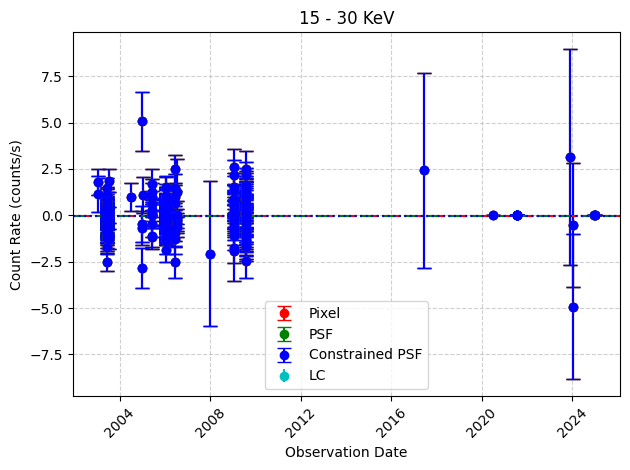

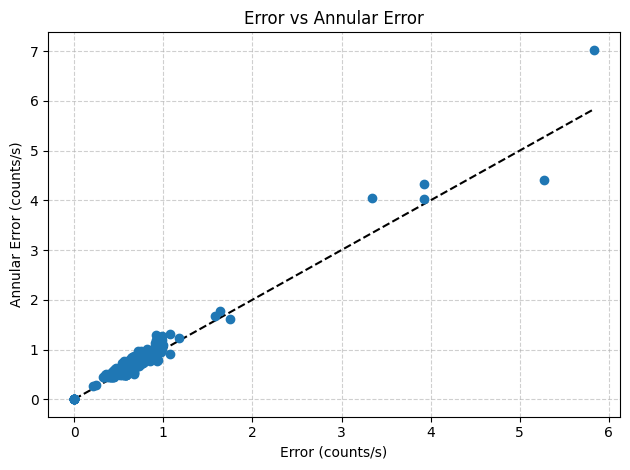

In [3]:
import matplotlib.pyplot as plt

img_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1]
lc_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc1_date]

# Calculate averages and standard deviations
avg_cr1 = np.mean(cr1)
std_cr1 = np.std(cr1)
avg_psf1 = np.mean(cr1_psf)
std_psf1 = np.std(cr1_psf)
avg_cpsf1 = np.mean(cr1_cpsf)
std_cpsf1 = np.std(cr1_cpsf)

avg_lc1 = np.mean(lc1)
std_lc1 = np.std(lc1)

# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times1, cr1, yerr=np.sqrt(vr1), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times1, cr1_psf, yerr=np.sqrt(vr1), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times1, cr1_cpsf, yerr=np.sqrt(vr1), color='b', fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(lc_times1, lc1, yerr=lc1_err, color='c', fmt='o', capsize=5, label='LC')

plt.axhline(avg_cr1, color='r', linestyle='--')
plt.axhline(avg_psf1, color='g', linestyle='-.')
plt.axhline(avg_cpsf1, color='b', linestyle=':')
plt.axhline(avg_lc1, color='c', linestyle='-.')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("15 - 30 KeV")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr1)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr1), np.sqrt(avr1), fmt='o', capsize=5)

plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Now for 30 - 60 keV range

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

img_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date2]
lc_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc2_date]

# Calculate averages and standard deviations
avg_cr2 = np.mean(cr2)
std_cr2 = np.std(cr2)
avg_psf2 = np.mean(cr2_psf)
std_psf2 = np.std(cr2_psf)
avg_cpsf2 = np.mean(cr2_cpsf)
std_cpsf2 = np.std(cr2_cpsf)

avg_lc2 = np.mean(lc2)
std_lc2 = np.std(lc2)

# Plot count rate over time with errorbars and std region
plt.figure()

plt.errorbar(img_times2, cr2, yerr=np.sqrt(vr2), color='r', fmt='o', capsize=5, label='Pixel')
plt.errorbar(img_times2, cr2_psf, yerr=np.sqrt(vr2), color='g', fmt='o', capsize=5, label='PSF')
plt.errorbar(img_times2, cr2_cpsf, yerr=np.sqrt(vr2), color='b', fmt='o', capsize=5, label='Constrained PSF')
plt.errorbar(lc_times2, lc2, yerr=lc2_err, color='c', fmt='o', capsize=5, label='LC')

plt.axhline(avg_cr2, color='r', linestyle='--')
plt.axhline(avg_psf2, color='g', linestyle='-.')
plt.axhline(avg_cpsf2, color='b', linestyle=':')
plt.axhline(avg_lc2, color='c', linestyle='-.')

plt.xlabel("Observation Date")
plt.ylabel("Count Rate (counts/s)")
plt.title("30 - 60 KeV")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()


# Plot error vs annular error
plt.figure()

# straight line
x = np.linspace(0, np.max(np.sqrt(vr2)), 100)
y = x
plt.plot(x, y, color='k', linestyle='--', label='y=x')

plt.errorbar(np.sqrt(vr2), np.sqrt(avr2), fmt='o', capsize=5)

plt.xlabel("Error (counts/s)")
plt.ylabel("Annular Error (counts/s)")
plt.title("Error vs Annular Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

Convert countrate to flux

In [6]:
crablc, crablc_err, crablc_date = loadCrabLC("../data/CrabLC_FITS_15_30")

_, crab_yearly = weighted_avg(crablc_date, crablc, crablc_err**2)
crab_means = [result['weighted_mean'] for year, result in crab_yearly.items()]
crab_stds = [result['weighted_std'] for year, result in crab_yearly.items()]

phflux1, pherr1, ergflux1, ergerr1 = cr2flux(cr1, vr1, date1, crab_means, crab_stds)
phflux2, pherr2, ergflux2, ergerr2 = cr2flux(cr2, vr2, date2, crab_means, crab_stds)

AttributeError: 'list' object has no attribute 'get'

Calculate weighted mean